Introduction to Priciple Component Analysis (PCA)
===============================

There are many blog posts explaining how PCA works.
However, I found that many either do not explain the necessary math or don't share any code.
Out of frustration, as well as to gain some better understanding of PCA I have written this post.
I hope you will find it usefull in getting a better understanding of PCA.

In order to understand this post I expect some knowledge of matrix algebra, but not too much.
You should probably also know what is a mean and variance, but other than that this should be rather basic.

In [123]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import joypy
import pandas as pd
%matplotlib inline

# Overview / Introduction

It is sometimes benefical to just start with an example.
Hence, I will perform PCA by hand on some example data first and then explain the underlying math.

Within this example I will use the famous iris data set.

In [129]:
dat = load_iris()
x = dat['data']
d = pd.DataFrame(x, columns=dat['feature_names'])
d.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's visualize the distribuion of these variables a bit to gain a better understanding.

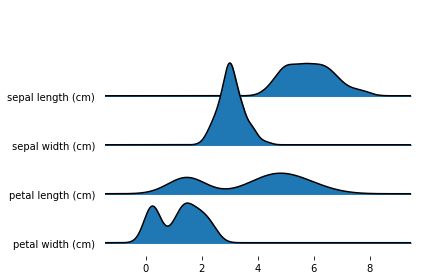

In [127]:
ax, fig = joypy.joyplot(pd.DataFrame(x, columns=dat['feature_names']))

As we can see the distribution of the different variables is rather diverse. 
Some seem to have rather large variances, while others shapes seem to suggest that there are multiple different distributions combined into one.

Hence let us standarize these variables to a mean of $0$ and a variance of $1$.

In [131]:
x -= np.mean(x, 0)
x /= np.std(x, 0)
xcov = np.cov(x.T)
xcov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In order to perform PCA it is necessary to compute the eigenvalues and eigenvectors of the covariance matrix (here called `xcov`).
Lukely numpy has a handy function to compute those values.
I will explain later how these values are computed so stay tuned.

In [132]:
eigenvalues, eigenvectores = np.linalg.eig(xcov)
print('eigenvalues: \n', eigenvalues)
print('eigenvectors: \n', eigenvectores)

eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601]
eigenvectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [133]:
pc = np.dot(x, eigenvectores)

In [99]:
def pca(dat, num_pc=1):
    # standardize
    n, p = dat.shape
    assert num_pc <= p
    assert num_pc > 0
    x = dat - np.mean(dat, 0)
    x /= np.std(dat, 0)
    cov = np.cov(x.T)
    E,V = np.linalg.eigh(cov)
    # get the top eigenvalues
    key = np.argsort(E)[::-1][:num_pc]
    E, V = E[key], V[:, key]
    U = np.dot(x, V)
    return U, E, V

In [109]:
x = dat['data']
x = np.random.randn(1000, 100)

n, p = x.shape
var_explained = list()
varR = np.sum(np.var(x, 0))
for i in range(p):
    components, eig, eigv = pca(x, i+1)
    var_explained.append(np.sum(np.var(components, 0))/ varR)

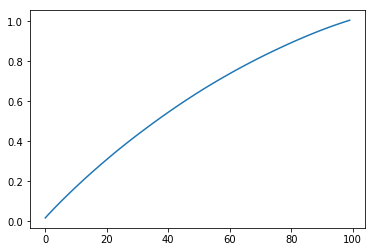

In [110]:
plt.plot(range(p), var_explained)